In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv('listings.csv')

In [2]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190708031549,2019-07-08,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.60
1,3850,https://www.airbnb.com/rooms/3850,20190708031549,2019-07-08,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.04
2,5858,https://www.airbnb.com/rooms/5858,20190708031549,2019-07-08,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90
3,7918,https://www.airbnb.com/rooms/7918,20190708031549,2019-07-08,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
4,8142,https://www.airbnb.com/rooms/8142,20190708031549,2019-07-08,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14


In [3]:
import seaborn as sns
import statsmodels

In [4]:
for i in data.columns:
    print(f'null values {i}   : {((data[i].isna().sum()/data.shape[0])*100).round(2)}')

null values id   : 0.0
null values listing_url   : 0.0
null values scrape_id   : 0.0
null values last_scraped   : 0.0
null values name   : 0.0
null values summary   : 2.78
null values space   : 16.24
null values description   : 0.3
null values experiences_offered   : 0.0
null values neighborhood_overview   : 26.08
null values notes   : 37.68
null values transit   : 30.73
null values access   : 34.85
null values interaction   : 33.19
null values house_rules   : 26.27
null values thumbnail_url   : 100.0
null values medium_url   : 100.0
null values picture_url   : 0.0
null values xl_picture_url   : 100.0
null values host_id   : 0.0
null values host_url   : 0.0
null values host_name   : 0.03
null values host_since   : 0.03
null values host_location   : 0.08
null values host_about   : 24.24
null values host_response_time   : 10.05
null values host_response_rate   : 10.05
null values host_acceptance_rate   : 100.0
null values host_is_superhost   : 0.03
null values host_thumbnail_url   : 0.03

columns that has morethan 50 % of missing values.

In [5]:
columns = ['thumbnail_url','medium_url','xl_picture_url','host_acceptance_rate','neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price']

data = data.drop(columns, axis = 1)

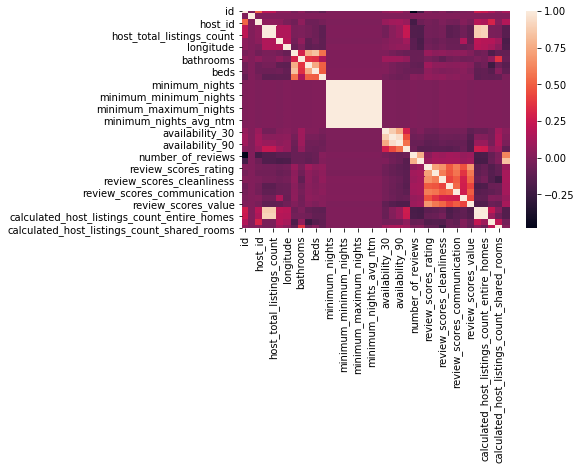

In [6]:
sns.heatmap(data.corr())

columns that has high collinearity are removed.

In [7]:
columns = ['availability_90','calculated_host_listings_count','host_listings_count','host_total_listings_count','maximum_minimum_nights','maximum_nights','maximum_nights_avg_ntm','minimum_maximum_nights','minimum_minimum_nights','minimum_nights','minimum_nights_avg_ntm']

data = data.drop(columns,axis = 1)

In [8]:
data.shape

(7738, 87)

columns that are urls, and had unique values throughout all the cells.

In [9]:
columns = ['picture_url','host_url','host_thumbnail_url','review_scores_cleanliness','review_scores_location','host_picture_url','listing_url', 'scrape_id','last_scraped','experiences_offered','calendar_last_scraped','country','country_code','experiences_offered','has_availability','is_business_travel_ready']

data = data.drop(columns,axis= 1)

In [10]:
data.shape

(7738, 72)

In [11]:
columns = ['host_name','first_review','last_review','number_of_reviews_ltm','license','reviews_per_month','review_scores_communication','review_scores_checkin','market','access','jurisdiction_names','summary','street','name','space','description', 'neighborhood_overview','notes','transit','city','state','zipcode','smart_location','calendar_updated','requires_license','interaction','house_rules','host_about']

data = data.drop(columns,axis = 1)

In [12]:
data.shape

(7738, 44)

In [13]:
data['calculated_host_listings_count_shared_rooms'].isna().sum()

0

In [14]:
data['calculated_host_listings_count_entire_homes'].isna().sum()

0

In [15]:
data['calculated_host_listings_count_private_rooms'].isna().sum()

0

In [16]:
data['review_scores_accuracy'].isna().sum()

1625

In [17]:
data['review_scores_rating'].isna().sum()

1621

In [18]:
data.isna().sum()

id                                                 0
host_id                                            0
host_since                                         2
host_location                                      6
host_response_time                               778
host_response_rate                               778
host_is_superhost                                  2
host_neighbourhood                               505
host_verifications                                 0
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood                                      0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                  

'host_name','host_since','host_location','host_is_superhost','host_has_profile_pic','host_identity_verified','bathrooms','bedrooms','beds','cancellation_policy' have some missing vlaues

In [19]:
data.dropna(subset = ['host_since','host_location','host_is_superhost','host_has_profile_pic','host_identity_verified','bathrooms','bedrooms','beds','cancellation_policy'],inplace = True)

In [20]:
data.isna().sum()

id                                                 0
host_id                                            0
host_since                                         0
host_location                                      0
host_response_time                               772
host_response_rate                               772
host_is_superhost                                  0
host_neighbourhood                               501
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                      0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                  

host_response_time, host_response_rate, host_neighbourhood,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_value has missing values more.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7703 entries, 0 to 7737
Data columns (total 44 columns):
id                                              7703 non-null int64
host_id                                         7703 non-null int64
host_since                                      7703 non-null object
host_location                                   7703 non-null object
host_response_time                              6931 non-null object
host_response_rate                              6931 non-null object
host_is_superhost                               7703 non-null object
host_neighbourhood                              7202 non-null object
host_verifications                              7703 non-null object
host_has_profile_pic                            7703 non-null object
host_identity_verified                          7703 non-null object
neighbourhood                                   7703 non-null object
neighbourhood_cleansed                          7703 non-null objec

### data type changing

In [22]:
data['host_since'] = pd.to_datetime(data['host_since'])

#### host response time

In [23]:
hostresponsetimes = pd.get_dummies(data['host_response_time'])

In [24]:
data['host_response_time'].value_counts()

within an hour        4178
within a few hours    1942
within a day           732
a few days or more      79
Name: host_response_time, dtype: int64

In [25]:
data['host_response_time'] = data['host_response_time'].fillna('within an hour')

In [26]:
#label encoding
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
data['host_response_time'] = T.fit_transform(data['host_response_time'])

In [27]:
data['host_since'] = pd.to_datetime(data['host_since'])
data['host_response_rate'] = data['host_response_rate'].str.replace('%','')

#replacing dollar
col = ['price','security_deposit','cleaning_fee','extra_people','host_response_rate']
for i in col:
    data[i] = data[i].str.replace('$','')
    data[i] = data[i].str.replace(',','')
    data[i] = data[i].astype(float)
    
#converte bool type columns to int type
col1 = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for i in col1:
    data[i] = pd.get_dummies(data[i])

host_location, host_verifications,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,property_type,room_type,bed_type,amenities,cancellation_policy

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7703 entries, 0 to 7737
Data columns (total 44 columns):
id                                              7703 non-null int64
host_id                                         7703 non-null int64
host_since                                      7703 non-null datetime64[ns]
host_location                                   7703 non-null object
host_response_time                              7703 non-null int64
host_response_rate                              6931 non-null float64
host_is_superhost                               7703 non-null uint8
host_neighbourhood                              7202 non-null object
host_verifications                              7703 non-null object
host_has_profile_pic                            7703 non-null uint8
host_identity_verified                          7703 non-null uint8
neighbourhood                                   7703 non-null object
neighbourhood_cleansed                          7703 non-null 

In [29]:
data1 = data.drop(['host_location','host_neighbourhood','host_verifications','neighbourhood','neighbourhood_cleansed','property_type','room_type','bed_type','amenities','cancellation_policy'],axis = 1)

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7703 entries, 0 to 7737
Data columns (total 34 columns):
id                                              7703 non-null int64
host_id                                         7703 non-null int64
host_since                                      7703 non-null datetime64[ns]
host_response_time                              7703 non-null int64
host_response_rate                              6931 non-null float64
host_is_superhost                               7703 non-null uint8
host_has_profile_pic                            7703 non-null uint8
host_identity_verified                          7703 non-null uint8
latitude                                        7703 non-null float64
longitude                                       7703 non-null float64
is_location_exact                               7703 non-null uint8
accommodates                                    7703 non-null int64
bathrooms                                       7703 non-null 

In [31]:
data1.isna().sum()

id                                                 0
host_id                                            0
host_since                                         0
host_response_time                                 0
host_response_rate                               772
host_is_superhost                                  0
host_has_profile_pic                               0
host_identity_verified                             0
latitude                                           0
longitude                                          0
is_location_exact                                  0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
security_deposit                                1557
cleaning_fee                                     826
guests_included                               

In [32]:
data1['host_response_rate'] = data1['host_response_rate'].fillna(data1['host_response_rate'].median())

In [33]:
data1['security_deposit']=data1['security_deposit'].fillna(data1['security_deposit'].median())

In [34]:
data1['cleaning_fee'] = data1['cleaning_fee'].fillna(data1['cleaning_fee'].median())

In [35]:
data1['review_scores_rating'] = data1['review_scores_rating'].fillna(data1['review_scores_rating'].median())

In [36]:
data1['review_scores_accuracy'] = data1['review_scores_accuracy'].fillna(data1['review_scores_accuracy'].median())

In [37]:
data1['review_scores_value'] = data1['review_scores_value'].fillna(data1['review_scores_value'].median())

In [38]:
data1.isna().sum()

id                                              0
host_id                                         0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
is_location_exact                               0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0


In [39]:
data2 = data1.drop('host_since',axis =1)

In [40]:
#check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata=data2.drop('price',axis = 1).copy()
Xdata['intercept']=1
Xdata=Xdata
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values
vif

,Vif,Variables
0,2.028149e+00,id
1,1.783926e+00,host_id
2,1.741779e+00,host_response_time
3,1.504281e+00,host_response_rate
4,1.282026e+00,host_is_superhost
5,1.057369e+00,host_has_profile_pic
6,1.431443e+00,host_identity_verified
7,1.176653e+00,latitude
8,1.107184e+00,longitude
9,1.367161e+00,is_location_exact


## from vif , remove values with > 4 

In [41]:
data2 = data2.drop(['id','host_id','latitude','longitude','availability_60','availability_30','accommodates'],axis = 1)

In [42]:
data2.head()

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,bathrooms,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3,92.0,0,0,0,0,1.0,1.0,2.0,170.0,...,194,97.0,10.0,9.0,0,1,1,1,0,0
1,3,100.0,0,0,0,0,1.0,1.0,1.0,99.0,...,126,93.0,9.0,9.0,1,1,1,0,3,0
2,1,80.0,1,0,0,0,1.0,2.0,3.0,235.0,...,111,98.0,10.0,9.0,1,1,1,1,0,0
3,3,100.0,1,0,0,0,4.0,1.0,1.0,65.0,...,17,85.0,8.0,8.0,1,1,1,0,9,0
4,3,100.0,1,0,0,0,4.0,1.0,1.0,65.0,...,8,93.0,9.0,9.0,1,1,1,0,9,0


# compare

In [53]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7703 entries, 0 to 7737
Data columns (total 26 columns):
host_response_time                              7703 non-null int64
host_response_rate                              7703 non-null float64
host_is_superhost                               7703 non-null uint8
host_has_profile_pic                            7703 non-null uint8
host_identity_verified                          7703 non-null uint8
is_location_exact                               7703 non-null uint8
bathrooms                                       7703 non-null float64
bedrooms                                        7703 non-null float64
beds                                            7703 non-null float64
price                                           7703 non-null float64
security_deposit                                7703 non-null float64
cleaning_fee                                    7703 non-null float64
guests_included                                 7703 non-null i

### General data

In [72]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### linear regression

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [75]:
lr.score(X_test, y_test)*100

15.805851353434097

#### ridge regresssion

In [76]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [77]:
rdg.score(X_test, y_test)*100

15.799248985385628

#### Random forest

In [78]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [79]:
rfr.score(X_test, y_test)*100

3.1650334739415253

#### Lasso regression

In [80]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [81]:
ls.score(X_test, y_test)*100

15.35740464491495

#### XGboost

In [82]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [83]:
xgb.score(X_test, y_test)* 100

21.88531800477057

### Normalization

In [84]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [85]:
from sklearn import preprocessing
normalize_X = preprocessing.normalize(X)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalize_X, y, test_size=0.20, random_state=42)

#### Linear regression

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [88]:
lr.score(X_test, y_test)*100

6.975479689068765

#### Ridge

In [89]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [90]:
rdg.score(X_test, y_test)*100

4.877863814554672

#### random forest

In [91]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [92]:
rfr.score(X_test, y_test)*100

11.058385779491998

#### Laso regression

In [93]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [94]:
ls.score(X_test, y_test)*100

4.309536708355555

#### XGBoost

In [95]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
xgb.score(X_test, y_test)* 100

16.46892097493774

## Standard scaling

In [97]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [99]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### linear regression

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [101]:
lr.score(X_test, y_test)*100

13.089760118565064

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_lr)

108488.06884417545

In [103]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

329.3752705413317

#### Ridge regression

In [104]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [105]:
rdg.score(X_test, y_test)*100

13.089242264152002

#### Random forest

In [106]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
rfr.score(X_test, y_test)*100

0.12300291036200228

#### Laso regression

In [108]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [109]:
ls.score(X_test, y_test)*100

12.854524055473892

#### XGBoost

In [110]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
xgb.score(X_test, y_test)* 100

20.83783483361318

#### Actual predicted

In [112]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_lr})
Randpred.head(100)


,actual,pred
6627,550.0,198.476747
4789,78.0,86.998315
7571,175.0,176.365863
2595,300.0,266.894665
2249,295.0,141.404195
4741,170.0,229.453389
2342,320.0,385.616632
698,89.0,162.271458
1965,2000.0,895.200100
5416,426.0,481.635476


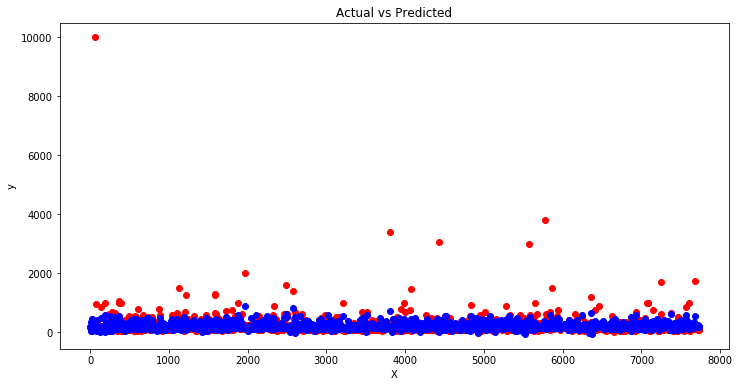

In [113]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Randpred['actual'],"ro") 
plt.plot(Randpred['pred'],"bo")   # regression line
  # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

## outlier removal

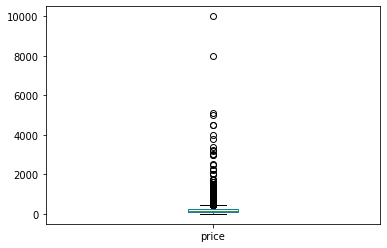

In [114]:
data2['price'].plot(kind = 'box')

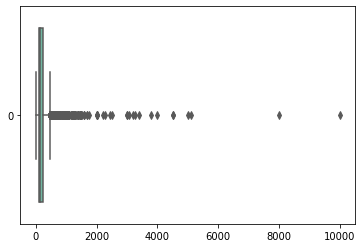

IQR 149.0
Upper 472.5
Lower 25.5


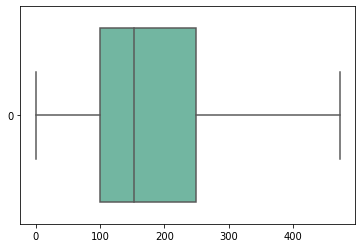

In [115]:
fig, axs = plt.subplots()
sns.boxplot(data= data2['price'],orient='h',palette="Set2")
plt.show()
q75, q25 = np.percentile(data2['price'], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
upper = q75 + (1.5*iqr)
print("Upper",upper)
lower = q75 - (1.5*iqr)
print("Lower",lower)
data2['price'] = data2['price'].clip(upper=upper)
fig, axs = plt.subplots()
sns.boxplot(data=data2['price'],orient='h',palette="Set2")
plt.show()


In [116]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [119]:
lr.score(X_test,y_test)*100

43.203129819119454

In [120]:
### ridge
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [121]:
rdg.score(X_test, y_test)*100

43.20135181224493

In [122]:
#### Random forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
rfr.score(X_test, y_test)*100

60.414822465431925

In [124]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [125]:
xgb.score(X_test, y_test)* 100

61.56658770142231

In [126]:
##feature importance

In [127]:
data3 = data2.drop('price',axis =1)

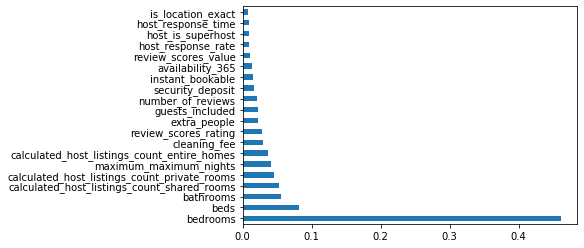

In [128]:
feat_importances = pd.Series(xgb.feature_importances_, index=data3.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.nlargest(20).plot(kind='barh')

In [129]:
X = data2.drop(['bedrooms','price'],axis  =1)
y = data2['price']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [131]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [132]:
xgb.score(X_test, y_test)* 100

59.4706928886648

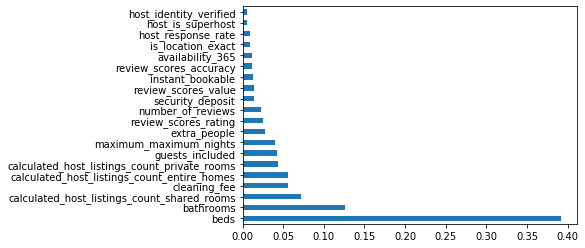

In [133]:
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.nlargest(20).plot(kind='barh')

In [134]:
### standardization
##normalizatin
## one-hot encoding

### standardizaiton

In [135]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [137]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [138]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:43:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [139]:
xgb.score(X_test, y_test)* 100

61.56215436104593

#### Standardization no improve in accuracy

### Normalization

In [140]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [141]:
from sklearn import preprocessing
normalize_X = preprocessing.normalize(X)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalize_X, y, test_size=0.20, random_state=42)

In [143]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [144]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [145]:
xgb.score(X_test, y_test)* 100

55.121448787283576

#### normalization reduce accuracy

#### One-hot encoding

In [146]:
response_times = pd.get_dummies(data['host_response_time'],drop_first= True)

In [147]:
One = pd.concat([data2,response_times],axis = 1)

In [148]:
One = One.drop('host_response_time',axis = 1)

In [149]:
X = One.drop('price',axis  =1)
y = One['price']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [151]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [153]:
xgb.score(X_test, y_test)* 100

61.61181257026435

### 'property_type','room_type','bed_type','amenities','cancellation_policy'

In [154]:
data[['property_type','room_type','bed_type','cancellation_policy']]

,property_type,room_type,bed_type,cancellation_policy
0,Apartment,Entire home/apt,Real Bed,moderate
1,House,Private room,Real Bed,strict_14_with_grace_period
2,Apartment,Entire home/apt,Real Bed,strict_14_with_grace_period
3,Apartment,Private room,Real Bed,strict_14_with_grace_period
4,Apartment,Private room,Real Bed,strict_14_with_grace_period
5,House,Entire home/apt,Real Bed,moderate
6,Apartment,Entire home/apt,Real Bed,moderate
7,Condominium,Private room,Real Bed,strict_14_with_grace_period
8,House,Private room,Real Bed,strict_14_with_grace_period
9,House,Entire home/apt,Real Bed,moderate


In [155]:
### Onehot encoding

In [156]:
propertytypes  = pd.get_dummies(data['property_type'])
roomtypes = pd.get_dummies(data['room_type'])
bedtypes = pd.get_dummies(data['bed_type'])
cancellations= pd.get_dummies(data['cancellation_policy'])

In [157]:
data2=  pd.concat([data2,propertytypes,roomtypes,bedtypes,cancellations],axis = 1)

In [158]:
data2.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people',
       'maximum_maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_value',
       'instant_bookable', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'Aparthotel',
       'Apartment', 'Bed and breakfast', 'Boat', 'Boutique hotel', 'Bungalow',
       'Cabin', 'Camper/RV', 'Condominium', 'Cottage', 'Earth house',
       'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Hut',
       'In-law', 'Loft', 'Other', 'Resort', 'Serviced apartment', 'Ti

In [159]:
#check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata=data2.drop('price',axis = 1).copy()
Xdata['intercept']=1
Xdata=Xdata
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values
vif

/home/purna/.local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/purna/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Vif,Variables
0,1.781527e+00,host_response_time
1,1.513820e+00,host_response_rate
2,1.336130e+00,host_is_superhost
3,1.063797e+00,host_has_profile_pic
4,1.225980e+00,host_identity_verified
5,1.350855e+00,is_location_exact
6,1.572594e+00,bathrooms
7,3.118253e+00,bedrooms
8,2.698177e+00,beds
9,1.273835e+00,security_deposit


#### model

In [160]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [162]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [163]:
xgb.score(X_test, y_test)* 100

62.96038676248214

In [164]:
###standardization
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [166]:
xgb.score(X_test, y_test)* 100

62.957784212308034

In [167]:
#### Random forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [168]:
rfr.score(X_test, y_test)* 100

62.87764287956038

### univariate selection

In [169]:
X = data2.drop('price',axis  =1)
y = data2['price']

In [170]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
y = np.array(y).astype(int)    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                                           Specs         Score
13                        maximum_maximum_nights  4.610362e+10
9                               security_deposit  1.288055e+06
22   calculated_host_listings_count_entire_homes  3.835908e+05
10                                  cleaning_fee  1.363295e+05
15                             number_of_reviews  1.180161e+05
14                              availability_365  1.092892e+05
24   calculated_host_listings_count_shared_rooms  4.495413e+04
12                                  extra_people  3.021791e+04
23  calculated_host_listings_count_private_rooms  2.385802e+04
53                                   Shared room  4.225762e+03
8                                           beds  2.098306e+03
7                                       bedrooms  2.080811e+03
11                               guests_included  1.762656e+03
27                             Bed and breakfast  1.758887e+03
52                                  Private room  1.627

In [171]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [172]:
chi_feature

['bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'maximum_maximum_nights',
 'availability_365',
 'number_of_reviews',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'Bed and breakfast',
 'Hostel',
 'Hotel',
 'Entire home/apt',
 'Private room',
 'Shared room',
 'super_strict_30',
 'super_strict_60']

/home/purna/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[2.80655347e-02 1.93253883e-02 1.76711593e-02 1.62632220e-03
 2.27749674e-02 1.92536434e-02 3.19317542e-02 3.04492140e-02
 3.66270100e-02 5.44591281e-02 6.73842965e-02 2.92377076e-02
 4.51259942e-02 6.13287817e-02 1.23014788e-01 7.79852499e-02
 6.47486647e-02 1.81812583e-02 3.62582446e-02 2.23651308e-02
 4.70403789e-03 5.80623269e-03 3.37690205e-02 3.30789853e-02
 4.96957617e-03 6.05092004e-04 1.20142256e-02 1.16167034e-03
 5.60771114e-05 3.29041698e-03 5.51792073e-04 8.34277628e-05
 4.07233281e-05 8.04584399e-03 3.30341941e-04 7.93221490e-05
 4.91148906e-03 9.88758374e-04 1.68361804e-03 2.81994358e-03
 1.12097320e-02 7.33722833e-05 4.04495596e-05 2.00970424e-03
 5.81881037e-04 6.85091533e-04 1.98273831e-03 1.33001310e-05
 1.13809603e-04 3.21546365e-03 9.12735459e-05 3.34946900e-03
 4.11515403e-03 2.38709752e-03 2.13465964e-04 1.45025412e-04
 8.56282649e-04 8.14368612e-04 1.56626788e-03 9.89803612e-03
 1.33735202e-02 7.63440165e-04 1.43242083e-02 9.46218199e-04
 4.25796927e-04]


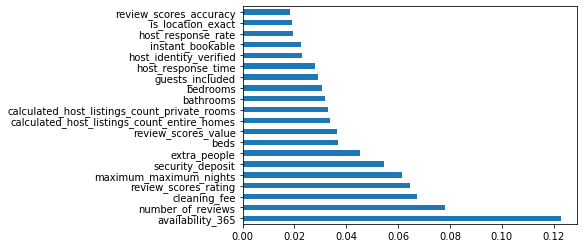

In [173]:
import pandas as pd
import numpy as np
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

lets apply normalization on it.


In [ ]:
dsfkjsddsfjdssldfs

#### Parameter tunning

In [ ]:
#xgb tuning 3
best_xgb_model = XGBRegressor(colsample_bytree=0.4,
                 gamma=12,                 
                 learning_rate=0.01,
                 max_depth=4,
                 n_estimators=1200,                                                                    
                 reg_alpha=0.4,
                 subsample=0.8)

In [ ]:
best_xgb_model.fit(X_train,y_train)
y_pred_xgb = best_xgb_model.predict(X_test)

In [ ]:
best_xgb_model.score(X_test, y_test)* 100

In [ ]:
### Random forests
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [ ]:
rfr.score(X_test,y_test)*100

In [ ]:
###gridserach random forest
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000,1200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train,y_train)


In [ ]:
grid_search.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


In [ ]:
###gridserach random forest
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000,1200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train,y_train)


In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


In [ ]:
from tpot import TPOTClassifier
#from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
#digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25) 
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2) 
tpot.fit(X_train, y_train) 
print(tpot.score(X_test, y_test)) 
#tpot.export('tpot_mnist_pipeline.py')


In [ ]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations = 5, population_size = 50, verbosity = 2)
tpot.fit(X_train,y_train)
print(tpot.score(X_test,y_test))

In [174]:
xgb= XGBRegressor(data2, learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, nthread=1, objective=reg:squarederror, subsample=0.7500000000000001)
xgb.fit(X_train, y_train)
y_pre_xgb = xgb.predict(X_test)

SyntaxError: invalid syntax (<ipython-input-174-4b7e905211b5>, line 1)

In [175]:
#xgb tuning 1
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.7500000000000001)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/home/purna/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [176]:
xgb.score(X_test,y_test)*100

65.41649654475835

In [177]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred_xgb,y_test)

4871.428654828092

In [178]:
np.sqrt(mean_squared_error(y_pred_xgb,y_test))

69.79562059920444

In [179]:
## actual vas predicted
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_xgb})
Randpred.head(100)


,actual,pred
6627,472.5,190.787704
4789,78.0,86.815155
7571,175.0,201.279266
2595,300.0,249.752060
2249,295.0,173.608261
4741,170.0,194.790787
2342,320.0,347.315643
698,89.0,115.323036
1965,472.5,503.171753
5416,426.0,414.375031


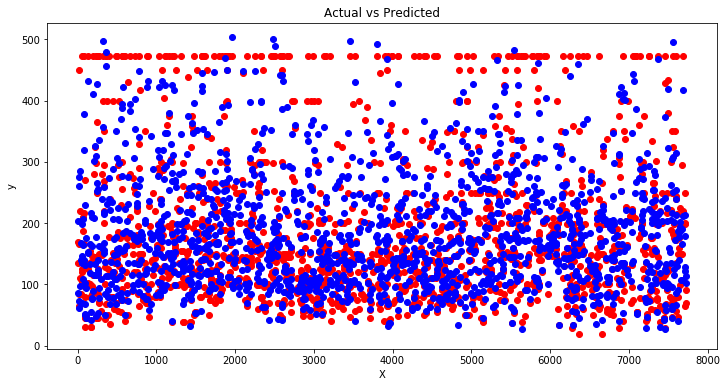

In [180]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Randpred['actual'],"ro") 
plt.plot(Randpred['pred'],"bo")   # regression line
  # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

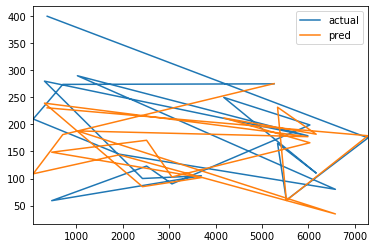

In [181]:
Randpred.head(20).plot(kind = 'line')

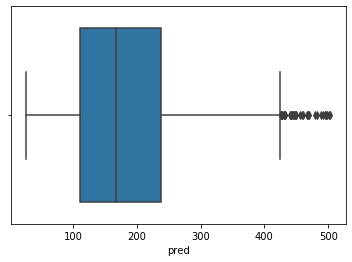

In [182]:
sns.boxplot(Randpred['pred'])

### outlier removal in other columns

In [ ]:
data2.columns

In [ ]:
sns.boxplot(data2['bedrooms'])

In [ ]:
data2['security_deposit'].value_counts()

In [ ]:
sns.boxplot(data2['security_deposit'])

In [ ]:
sns.boxplot(data2['cleaning_fee'])

In [ ]:
data1.columns

In [ ]:
data5 = data1.drop(['host_id','host_since','latitude','longitude'],axis = 1)

In [ ]:
X1 = data5.drop('price',axis = 1)
y1 = data5['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [ ]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations = 5, population_size = 50, verbosity = 2)
tpot.fit(X_train,y_train)
print(tpot.score(X_test,y_test))

In [ ]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoLarsCV
#xgb tuning 1
#from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(RobustScaler(LassoLarsCV(RobustScaler(data5), normalize=False)), alpha=0.8, learning_rate=0.1, loss=huber, max_depth=7, max_features=0.8500000000000001, min_samples_leaf=15, min_samples_split=6, n_estimators=100, subsample=0.6000000000000001)
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

In [ ]:
data

In [ ]:

X1 = data.drop(['host_since','price'],axis = 1)
y1 = data['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [ ]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations = 5, population_size = 50, verbosity = 2)
tpot.fit(X_train,y_train)
print(tpot.score(X_test,y_test))
tpot.export('tpot_mnist_pipeline.py')

In [ ]:
data

In [ ]:
X1 = data.drop(['host_since','price'],axis = 1)
y1 = data['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
model1 = MultinomialNB().fit(X_train , data["host_neighbourhood"]) 
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1] 
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"]))) 
check["multi"] = model1.predict(checktfidf)
## Predicting Sentiment for Check which was Null values for rating

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

data["Summary_Clean"] = data["host_verifications"].apply(cleanup)
#check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

In [ ]:
data['Summary_Clean']